In [2]:
# Notebook 02
# Define momentum metrics (rolling / EWMA) and visualize

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)


In [3]:
data_path = "../data/raw/Wimbledon_featured_matches.csv"
df = pd.read_csv(data_path)

# 选定一场比赛（把这里换成你想看的 match_id）
match_id = "2023-wimbledon-1701"
df_match = df[df["match_id"] == match_id].copy()

# 按比赛顺序排序：盘 -> 局 -> 分
df_match = df_match.sort_values(
    by=["set_no", "game_no", "point_no"]
).reset_index(drop=True)

# point_result: player1赢=+1, player2赢=-1
df_match["point_result"] = np.where(df_match["point_victor"] == 1, 1, -1)

# 用于对照的累计分差
df_match["cumulative_score"] = df_match["point_result"].cumsum()

df_match.shape, df_match.head()


((334, 48),
               match_id         player1         player2 elapsed_time  set_no  game_no  point_no  p1_sets  p2_sets  \
 0  2023-wimbledon-1701  Carlos Alcaraz  Novak Djokovic     00:00:00       1        1         1        0        0   
 1  2023-wimbledon-1701  Carlos Alcaraz  Novak Djokovic     00:00:25       1        1         2        0        0   
 2  2023-wimbledon-1701  Carlos Alcaraz  Novak Djokovic     00:01:19       1        1         3        0        0   
 3  2023-wimbledon-1701  Carlos Alcaraz  Novak Djokovic     00:02:17       1        1         4        0        0   
 4  2023-wimbledon-1701  Carlos Alcaraz  Novak Djokovic     00:03:02       1        1         5        0        0   
 
    p1_games  p2_games p1_score p2_score  server  serve_no  point_victor  p1_points_won  p2_points_won  game_victor  \
 0         0         0        0        0       2         1             2              0              1            0   
 1         0         0        0       15      

In [4]:
window = 15  # 先选一个不大的窗口（之后可以调）
df_match["momentum_rm"] = (
    df_match["point_result"]
    .rolling(window=window, min_periods=1)
    .mean()
)

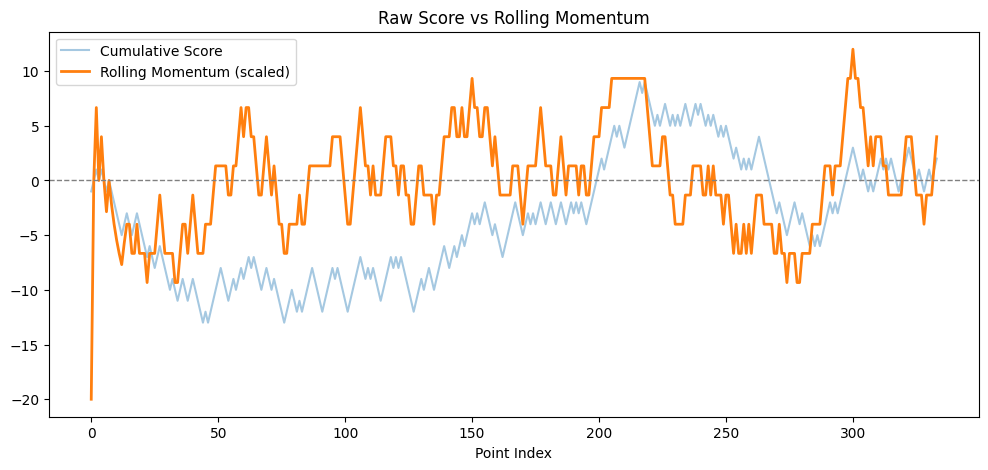

In [5]:
plt.figure(figsize=(12, 5))

plt.plot(df_match["cumulative_score"], label="Cumulative Score", alpha=0.4)
plt.plot(df_match["momentum_rm"] * 20, label="Rolling Momentum (scaled)", linewidth=2)

plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.legend()
plt.title("Raw Score vs Rolling Momentum")
plt.xlabel("Point Index")
plt.show()